# Evolving Clustering for Data Stream

## SOStream

Andressa Stéfany, Rute Abreu e Yuri Thomas

# SOStream

![alt text](https://ia801409.us.archive.org/29/items/CapturaDeTelaDe20190407191831/Captura%20de%20tela%20de%202019-04-07%2019-18-31.png)


Applying SOStream to the database: [Clustering basic benchmark](http://cs.joensuu.fi/sipu/datasets/)

## 1. Database S1

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1.1 SOStream

`clustering = SOStream(alpha = 0, min_pts = 3, merge_threshold = 59900)`

In [41]:
from sostream import SOStream

In [42]:
data_s1 = pd.read_csv('../data/s1.txt', delimiter='    ', header=None, engine='python')
print(data_s1.describe())

data_s1cb = pd.read_csv('../data/s-originals/s1-cb.txt', delimiter=' ', header=None, engine='python')
data_s1cb = data_s1cb.loc[:,:1]

                   0              1
count    5000.000000    5000.000000
mean   514937.556600  494709.292800
std    244465.901926  235840.852969
min     19835.000000   51121.000000
25%    320352.500000  320107.750000
50%    505338.500000  526259.500000
75%    786228.750000  713713.500000
max    961951.000000  970756.000000


In [56]:
sostream_clusteringS1 = SOStream(alpha = 0, min_pts = 3, merge_threshold = 59900)

for r in data_s1.values:
    sostream_clusteringS1.process(r)

s1 = np.array([c.centroid for c in sostream_clusteringS1.M[-1]])


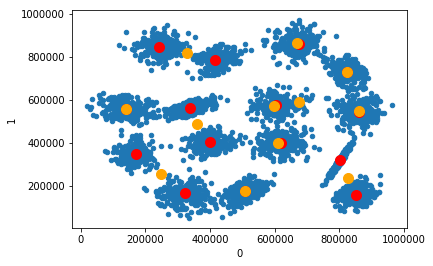

In [57]:
data_s1.plot.scatter(x=0,y=1)
plt.scatter(data_s1cb.loc[:,0],data_s1cb.loc[:,1],color='red',s=100)
plt.scatter(s1[:,0], s1[:,1], color='orange',s=100)

plt.show()

### 1.2 DBSCAN

`clustering = DBSCAN(eps=20000, min_samples=5).fit(X)`

In [44]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

In [45]:
X = data_s1.values
clustering = DBSCAN(eps=20000, min_samples=5).fit(X)
clustering

DBSCAN(algorithm='auto', eps=20000, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [59]:
core_samples_mask = np.zeros_like(clustering.labels_, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True
labels = clustering.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

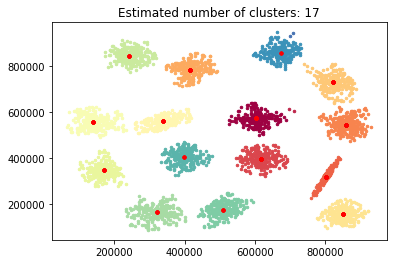

In [60]:
for k, col in zip(unique_labels, colors):        
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    
    plt.plot(xy[:, 0], xy[:, 1], '.',
         markerfacecolor=tuple(col),
         markeredgecolor=tuple(col),
         markersize=5
        )
    plt.plot(data_s1cb.loc[:,0],data_s1cb.loc[:,1],'.',color='red')

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [49]:
# Database S1
print('Clusters pelo SOStream: ',s1.shape[0])
print('Clusters pelo DBSCAN: ',len(np.unique(clustering.labels_)))
print('Clusters verdadeiros: ',data_s1cb.shape[0])

Clusters pelo SOStream:  12
Clusters pelo DBSCAN:  18
Clusters verdadeiros:  15


## 2. Database S2

### 2.1 SOStream

`clustering = SOStream(alpha = 0, min_pts = 3, merge_threshold = 67000)`

In [20]:
data_s2 = pd.read_csv('../data/s2.txt', delimiter='    ', header=None, engine='python')
print(data_s2.describe())

data_s2cb = pd.read_csv('../data/s-originals/s2-cb.txt', delimiter=' ', header=None, engine='python')
data_s2cb = data_s2cb.loc[:,:1]

                   0              1
count    5000.000000    5000.000000
mean   525659.356400  477365.536400
std    220767.929728  233838.906612
min     55608.000000   25631.000000
25%    365718.250000  245461.500000
50%    539262.000000  471640.500000
75%    725951.250000  696209.000000
max    983609.000000  984555.000000


In [54]:
sostream_clusteringS2 = SOStream(alpha = 0, min_pts = 3, merge_threshold = 67000)

for r in data_s2.values:
    sostream_clusteringS2.process(r)

s2 = np.array([c.centroid for c in sostream_clusteringS2.M[-1]])

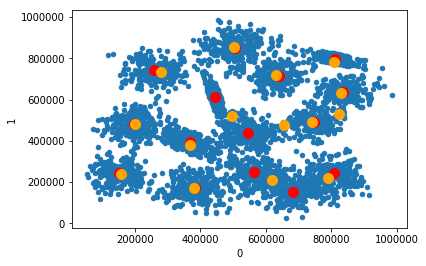

In [55]:
data_s2.plot.scatter(x=0,y=1)
plt.scatter(data_s2cb.loc[:,0],data_s2cb.loc[:,1],color='red', s=100)
plt.scatter(s2[:,0], s2[:,1], color='orange', s=100)

plt.show()

### 2.2 DBSCAN

`clustering = DBSCAN(eps=50000, min_samples=100).fit(X_S2)`

In [29]:
X_S2 = data_s2.values
clustering_s2 = DBSCAN(eps=50000, min_samples=100).fit(X_S2)
clustering_s2

DBSCAN(algorithm='auto', eps=50000, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=100, n_jobs=1, p=None)

In [34]:
core_samples_mask = np.zeros_like(clustering_s2.labels_, dtype=bool)
core_samples_mask[clustering_s2.core_sample_indices_] = True
labels = clustering_s2.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

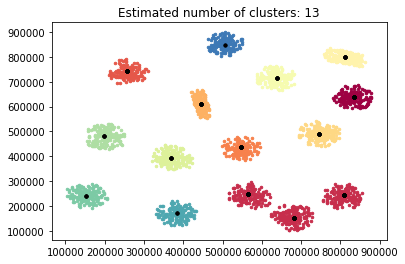

In [35]:
for k, col in zip(unique_labels, colors):        
    class_member_mask = (labels == k)
    xy = X_S2[class_member_mask & core_samples_mask]
    
    plt.plot(xy[:, 0], xy[:, 1], '.',
         markerfacecolor=tuple(col),
         markeredgecolor=tuple(col),
         markersize=5
        )
    plt.plot(data_s2cb.loc[:,0],data_s2cb.loc[:,1],'.',color='black')

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [68]:
# Database s2
print('Clusters pelo SOStream: ',s2.shape[0])
print('Clusters pelo DBSCAN: ',len(np.unique(clustering_s2.labels_)))
print('Clusters verdadeiros: ',data_s2cb.shape[0])

Clusters pelo SOStream:  15
Clusters pelo DBSCAN:  14
Clusters verdadeiros:  15


## 3. Database S3

### 3.1 SOStream

`clustering = SOStream(alpha = 0, min_pts = 3, merge_threshold = 100000)`

In [26]:
data_s3 = pd.read_csv('../data/s3.txt', delimiter='    ', header=None, engine='python')
print(data_s3.describe())

data_s3cb = pd.read_csv('../data/s-originals/s3-cb.txt', delimiter='	', header=None, engine='python')
data_s3cb = data_s3cb.loc[:,:1]

                   0              1
count    5000.000000    5000.000000
mean   496564.695000  485799.739600
std    196628.464271  198939.143541
min     32710.000000   70003.000000
25%    329967.500000  317271.000000
50%    502124.500000  460873.500000
75%    654700.000000  649026.250000
max    942327.000000  947322.000000


In [61]:
sostream_clusteringS3 = SOStream(alpha = 0, min_pts = 3, merge_threshold = 100000)

for r in data_s3.values:
    sostream_clusteringS3.process(r)

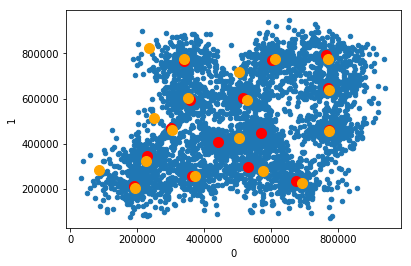

In [63]:
data_s3.plot.scatter(x=0,y=1)
s3 = np.array([c.centroid for c in sostream_clusteringS3.M[-1]])
plt.scatter(data_s3cb.loc[:,0],data_s3cb.loc[:,1],color='red',s=100)
plt.scatter(s3[:,0], s3[:,1], color='orange',s=100)

plt.show()

### 2.2 DBSCAN

`clustering = DBSCAN(eps=40999, min_samples=100).fit(X_S3)`

In [28]:
X_S3 = data_s3.values
clustering_s3 = DBSCAN(eps=40999, min_samples=100).fit(X_S3)
clustering_s3

DBSCAN(algorithm='auto', eps=40999, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=100, n_jobs=1, p=None)

In [64]:
core_samples_mask = np.zeros_like(clustering_s3.labels_, dtype=bool)
core_samples_mask[clustering_s3.core_sample_indices_] = True
labels = clustering_s3.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

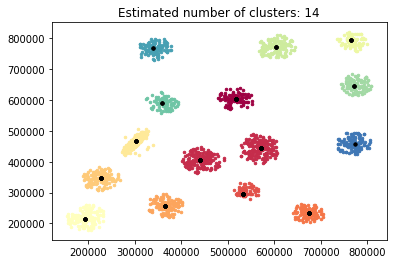

In [65]:
for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = X_S3[class_member_mask & core_samples_mask]
    
    plt.plot(xy[:, 0], xy[:, 1], '.',
         markerfacecolor=tuple(col),
         markeredgecolor=tuple(col),
         markersize=5
        )
    plt.plot(data_s3cb.loc[:,0],data_s3cb.loc[:,1],'.',color='black')
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [69]:
# Database s3
print('Clusters pelo SOStream: ',s3.shape[0])
print('Clusters pelo DBSCAN: ',len(np.unique(clustering_s3.labels_)))
print('Clusters verdadeiros: ',data_s3cb.shape[0])

Clusters pelo SOStream:  18
Clusters pelo DBSCAN:  15
Clusters verdadeiros:  15


### Obrigado!
##### Dúvidas?